# Pendulum's Nonlinear Tendencies -Shantanu Dash

#### _In this file I intend to compare the x-t and v-x(phase) plots of the undamped and damped pendulum(oscillator in general).Also i will try to plot the bifurcation diagram of the undamped pendulum_

The general equation for the linear oscillator is given as:

\begin{align}
\frac{d^{2}x}{dt^{2}} +\alpha \frac{dx}{dt} +\omega_{0}^{2}x=f sin(\omega t)
\end{align}

where $\frac{\omega_{0}}{2\pi}$ corresponds to the natural frequency, $\alpha$ is strength of the damping, while $f$ and $\omega$ stand for the forcing ampltude and angular frequency,
where $x(t)$ is the amplitude of oscillation of a system of unit mass subjected to initial conditions ,

\begin{align}
x(0)=A(const) \\ \\
\frac{dx}{dt}\vert_{t=0}=\dot{x}(0)=0
\end{align}

This can be written into two coupled first order differential equations:
\begin{align}
\frac{dx}{dt}&=p\\
\frac{dp}{dt}&=-\alpha\cdot p -\omega_{0}^{2}x +f sin(\omega t)
\end{align}

In [3]:
#%matplotlib inline
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# define equation
def pendulum_der(x,p,t,w0,alpha=0,f=0,w=0):
    x_dot=p
    p_dot=-alpha*p-w0*w0*x+f*np.sin(w*t)
    return x_dot,p_dot


def visualize(x0,p0,t0,w0,Title="Title",alpha=0,f=0,w=0,steps=10000,delta_t=0.01):
    # initialize solutions arrays (+1 for initial conditions)
    xx = np.empty((steps + 1))
    pp = np.empty((steps + 1))
    t  = np.empty((steps + 1))
    # fill in initial conditions
    xx[0], pp[0] ,t[0]= (x0,p0,t0)#(0.1, -0.1,0)

    # solve equation system
    for i in range(steps):
    # Calculate derivatives	
        x_dot, p_dot = pendulum_der(xx[i], pp[i],t[i],w0,alpha,f,w)
        xx[i + 1] = xx[i] + (x_dot * delta_t)
        pp[i + 1] = pp[i] + (p_dot * delta_t)
        t[i + 1]  = t[i]  + delta_t

    plt.style.use('dark_background')
    plt.figure(figsize=(16,7))
    plt.subplot(1, 2, 1)
    plt.title(Title)
    plt.xlim((min(xx),max(xx))) 
    plt.ylim((min(pp),max(pp)))
    plt.plot(xx, pp,'.',color='white',markersize=0.5)
    plt.xlabel("x(t)-(displacement)")
    plt.ylabel("$\dot{x}(t)$-(velocity)")
    
    plt.subplot(1, 2, 2)
    plt.title("Displacement Time Graph")
    plt.xlim((min(t),max(t))) 
    plt.ylim((min(xx),max(xx)))
    #plt.figure(figsize=(7,4))
    plt.xlabel("t-(time)")
    plt.ylabel("x(t)-(displacement)")
    plt.plot(t,xx,'.',color='white',markersize=0.5)
    plt.show()


In [45]:
'''
routine for animation
%matplotlib qt
for i in range(5000,10000):
    plt.xlim((min(xx),max(xx))) 
    plt.ylim((min(pp),max(pp)))
    #plt.clf()
    plt.plot(xx[i],pp[i])
    plt.title("Time= "+str(t[i]))
    plt.pause(0.0000001)
    
''';

## Free oscillations or Simple Harmonic Oscillations

In [4]:
#visualize(0.1,0.0,0,2*np.pi,"SHM")#x0,p0,t0,w0,Title,alpha=0,f=0,w=0
interactivepl=interactive(visualize,w0=(-5,5,1),x0=(-1,1,0.1),p0=(-1,1,0.1),t0=(0,100,5),Title="SHM",alpha=0)
interactivepl

interactive(children=(FloatSlider(value=0.0, description='x0', max=1.0, min=-1.0), FloatSlider(value=0.0, desc…

## Damped Oscillations

Here $\alpha\neq0$, $f=0$, and we have three possible states:

- underdamping: $\alpha < 2\omega_{0}$
- overdamping: $\alpha > 2\omega_{0}$
- critical damping:  $\alpha = 2\omega_{0}$

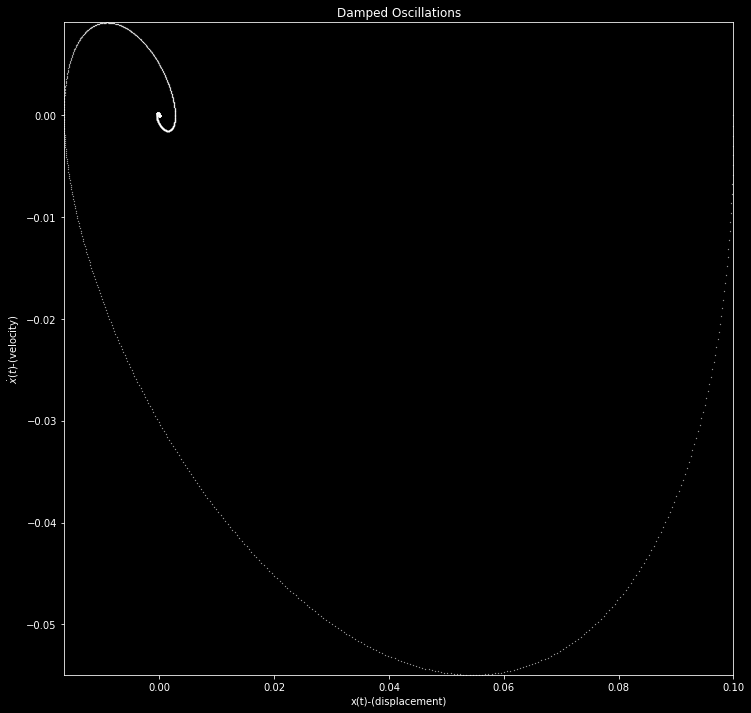

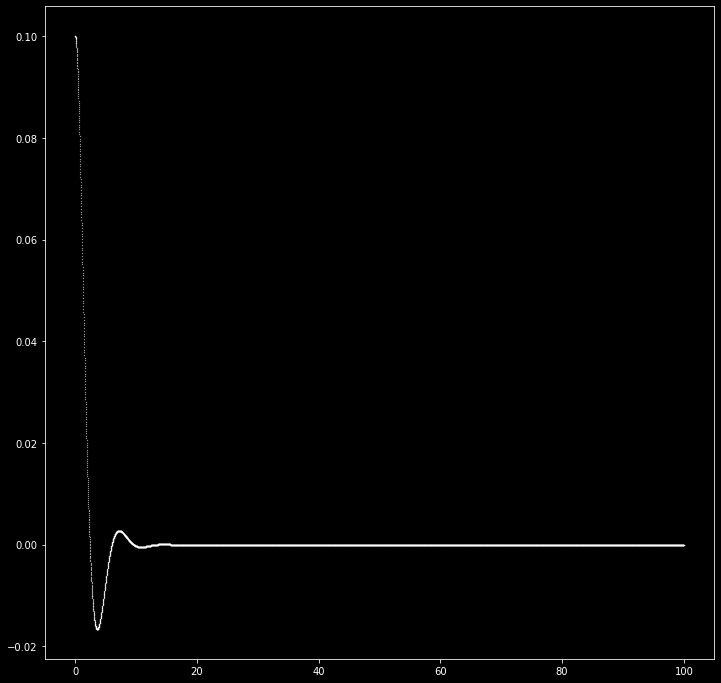

0

In [37]:
visualize(0.1,0.0,0,1,"Damped Oscillations",1)#x0,p0,t0,w0,Title,alpha=0,f=0,w=0

## Damped and Forced Oscillations

Here $f\neq0$.

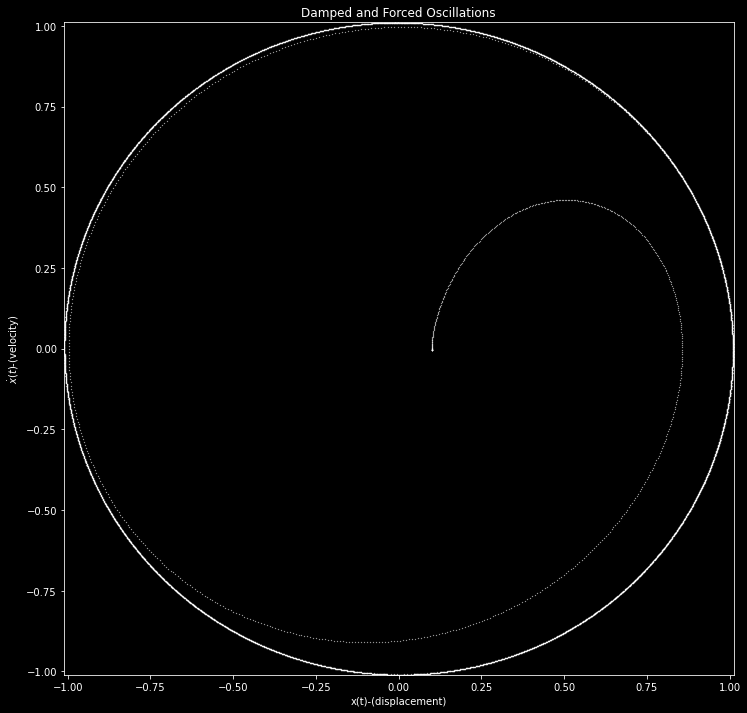

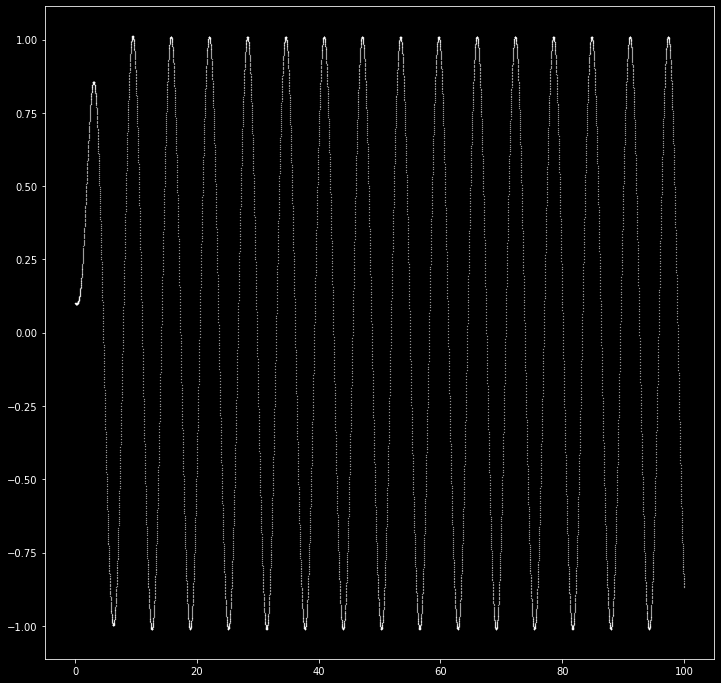

0

In [38]:
visualize(0.1,0.0,0,1,"Damped and Forced Oscillations",1,1,1)#x0,p0,t0,w0,Title,alpha=0,f=0,w=0